In [3]:
import os  # Модуль для роботи з файловою системою (отримання розміру файлу тощо)
import pandas as pd  # Бібліотека для роботи з таблицями (DataFrame)
from PIL import Image  # Бібліотека Pillow для обробки зображень
import numpy as np  # Бібліотека для роботи з числовими масивами (хоча тут не використовується)
from pathlib import Path  # Модуль для роботи з шляхами у файловій системі

# Функція для отримання інформації про зображення
def get_image_info(image_path):
    try:
        with Image.open(image_path) as img:  # Відкрити зображення
            format = img.format  # Формат зображення (наприклад, JPEG, PNG)
            mode = img.mode  # Колірна модель зображення (наприклад, RGB, L)
            width, height = img.size  # Розміри зображення (ширина, висота)
            channels = len(img.getbands())  # Кількість каналів (наприклад, 3 для RGB)

            # Змінити розмір зображення до 100x100 пікселів
            img_resized = img.resize((100, 100))  
            img_resized_path = image_path.stem + "_resized.jpg"  # Зберегти ім'я для збереженого зображення
            img_resized.save(img_resized_path)  # Зберегти зображення з новим розміром

            # Отримати розмір файлу в мегабайтах
            file_size_mb = os.path.getsize(image_path) / (1024 * 1024)  
            file_size_mb = round(file_size_mb, 2)  # Округлити до 2 десяткових знаків

            # Повернути інформацію про зображення у вигляді словника
            return {
                'filename': image_path.name,  # Назва файлу
                'color_model': mode,  # Колірна модель
                'format': format,  # Формат файлу
                'channels': channels,  # Кількість каналів
                'file_size_mb': file_size_mb,  # Розмір файлу в мегабайтах
                'width': width,  # Ширина зображення
                'height': height,  # Висота зображення
                'full_path': str(image_path),  # Повний шлях до файлу
                'resized_image': img_resized_path  # Шлях до зменшеного зображення
            }
    except Exception as e:
        # У разі помилки повертає None
        return None

# Функція для отримання інформації про всі зображення в папці
def get_images_in_folder(folder_path):
    image_info_list = []  # Список для зберігання інформації про зображення
    folder_path = Path(folder_path)  # Перетворити шлях у формат pathlib
    
    # Пройтись по всіх файлах у папці
    for file in folder_path.iterdir():
        # Перевірити, чи файл має один із підтримуваних форматів
        if file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp', '.jfif']:
            image_info = get_image_info(file)  # Отримати інформацію про зображення
            if image_info:  # Якщо інформація успішно отримана
                image_info_list.append(image_info)  # Додати до списку
        else:
            continue  # Пропустити файли з непідтримуваними форматами

    return image_info_list  # Повернути список з інформацією про зображення

# Функція для створення DataFrame із інформацією про зображення
def create_image_dataframe(folder_path):
    images_info = get_images_in_folder(folder_path)  # Отримати інформацію про всі зображення
    df = pd.DataFrame(images_info)  # Перетворити список інформації у DataFrame
    return df  # Повернути DataFrame

# Шлях до папки із зображеннями
folder_path = r'D:\piton\lab4'  # Ваша папка

# Створення DataFrame із інформацією про зображення
dff = create_image_dataframe(folder_path)

from IPython.display import HTML  # Модуль для створення HTML-таблиць у Jupyter Notebook

# Виведення DataFrame у вигляді HTML-таблиці з відображенням зменшених зображень
HTML(dff.to_html(formatters={'resized_image': lambda x: f'<img src="{x}" width="100" />'}, escape=False))


Постер 1 (2x2) - 4 зображення:


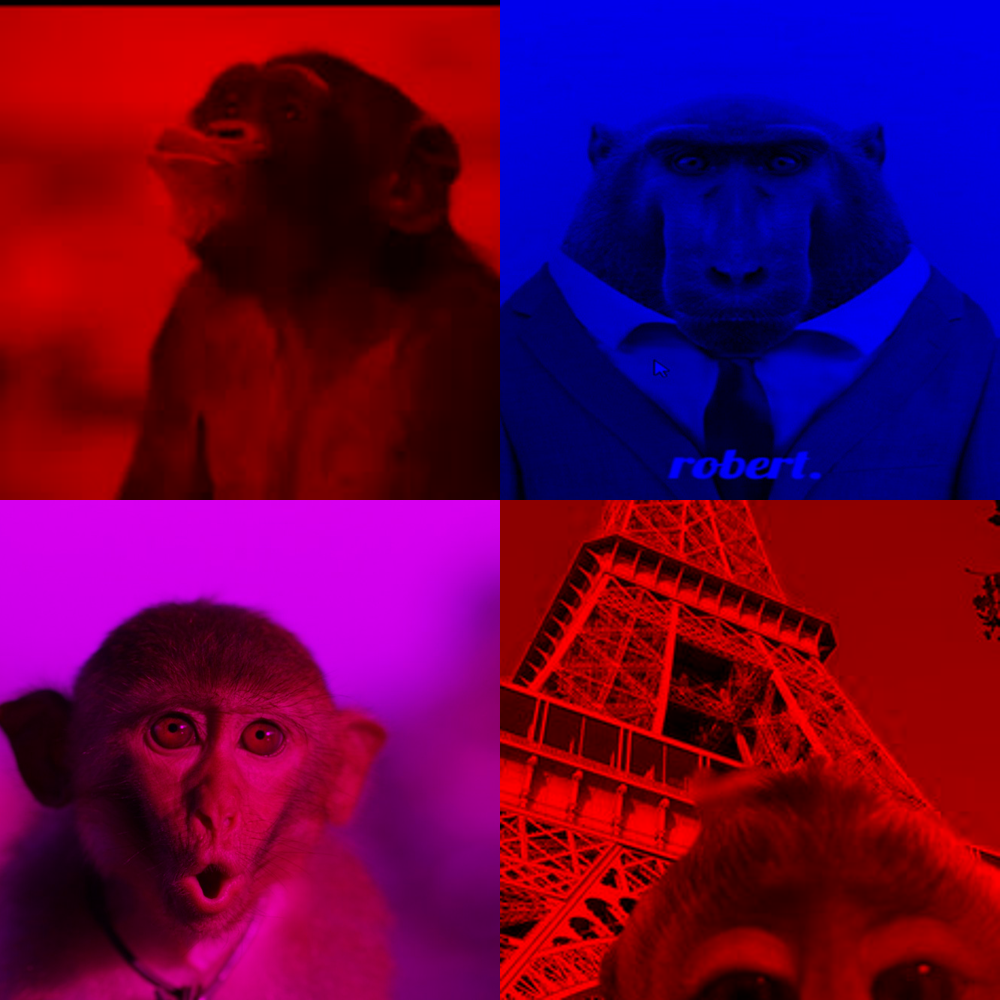

In [4]:
import os  # Модуль для роботи з файловою системою
import random  # Модуль для вибору випадкових елементів
from PIL import Image  # Бібліотека Pillow для обробки зображень
import numpy as np  # Бібліотека для роботи з масивами
from IPython.display import display  # Модуль для відображення зображень у Jupyter Notebook
import base64  # Модуль для кодування/декодування в Base64
from io import BytesIO  # Модуль для роботи з файловими потоками в пам'яті

# Функція для обрізки зображення до квадратного розміру
def resize_to_square(image):
    """Обрізає зображення до квадратного формату, зберігаючи центральну частину."""
    width, height = image.size  # Отримати розміри зображення
    new_size = min(width, height)  # Обчислити розмір найменшої сторони
    
    # Обчислити координати для обрізки
    left = (width - new_size) // 2
    top = (height - new_size) // 2
    right = (width + new_size) // 2
    bottom = (height + new_size) // 2
    
    return image.crop((left, top, right, bottom))  # Обрізати зображення

# Функція для застосування випадкового кольорового фільтра
def apply_filter(image):
    """Застосовує випадковий кольоровий фільтр до зображення."""
    filters = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan']  # Список можливих фільтрів
    filter_type = random.choice(filters)  # Випадковий вибір фільтра
    
    np_image = np.array(image)  # Перетворити зображення у NumPy-масив
    
    # Застосувати вибраний фільтр, обнуляючи непотрібні канали
    if filter_type == 'red':
        np_image[:, :, 1:] = 0  # Залишити лише червоний канал
    elif filter_type == 'green':
        np_image[:, :, [0, 2]] = 0  # Залишити лише зелений канал
    elif filter_type == 'blue':
        np_image[:, :, :2] = 0  # Залишити лише синій канал
    elif filter_type == 'yellow':
        np_image[:, :, 2] = 0  # Видалити синій канал (жовтий = червоний + зелений)
    elif filter_type == 'purple':
        np_image[:, :, 1] = 0  # Видалити зелений канал (фіолетовий = червоний + синій)
    elif filter_type == 'cyan':
        np_image[:, :, 0] = 0  # Видалити червоний канал (ціан = зелений + синій)
    
    return Image.fromarray(np_image)  # Перетворити масив назад у зображення

# Функція для створення постера з випадкових зображень
def create_poster(folder_path, output_name, cols, rows):
    """
    Створює постер з квадратних зображень із застосуванням випадкових фільтрів.
    
    Параметри:
    - folder_path: шлях до папки з зображеннями
    - output_name: ім'я вихідного постера (використовується лише для відображення)
    - cols: кількість зображень у стовпці
    - rows: кількість зображень у рядку
    """
    # Отримати список файлів зображень у папці
    images = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff', '.webp', '.jfif'))]
    
    if not images:  # Перевірити, чи в папці є зображення
        print("У вказаній папці немає зображень!")
        return
    
    poster_images = []  # Список для збереження зображень для постера
    
    # Вибрати зображення для постера
    while len(poster_images) < rows * cols:
        try:
            img_path = os.path.join(folder_path, random.choice(images))  # Випадковий вибір зображення
            image = Image.open(img_path)  # Відкрити зображення
            
            image = resize_to_square(image)  # Обрізати до квадратного розміру
            image = image.resize((500, 500))  # Змінити розмір до 500x500 пікселів
            
            image = apply_filter(image)  # Застосувати випадковий фільтр
            
            poster_images.append(image)  # Додати оброблене зображення до списку
        except Exception as e:
            print(f"Помилка при обробці зображення: {e}")
            continue  # Пропустити проблемні зображення
    
    # Перевірити, чи вистачає зображень для створення постера
    if len(poster_images) < rows * cols:
        print(f"Не вистачає зображень для створення постера! Має бути {rows * cols}, а отримано {len(poster_images)}.")
        return
    
    # Розміри постера
    poster_width = 500 * cols
    poster_height = 500 * rows
    poster = Image.new('RGB', (poster_width, poster_height))  # Створити порожнє зображення для постера
    
    # Розмістити оброблені зображення на постері
    for i in range(rows):
        for j in range(cols):
            img = poster_images[i * cols + j]  # Вибрати зображення
            poster.paste(img, (j * 500, i * 500))  # Вставити у відповідну позицію
    
    return poster  # Повернути готовий постер

# Створення та відображення постера
poster1 = create_poster(r'D:\piton\lab4', 'poster_1', 2, 2)
print("Постер 1 (2x2) - 4 зображення:")
display(poster1)  # Відобразити створений постер


Постер 2 (2x2) - 4 зображення:


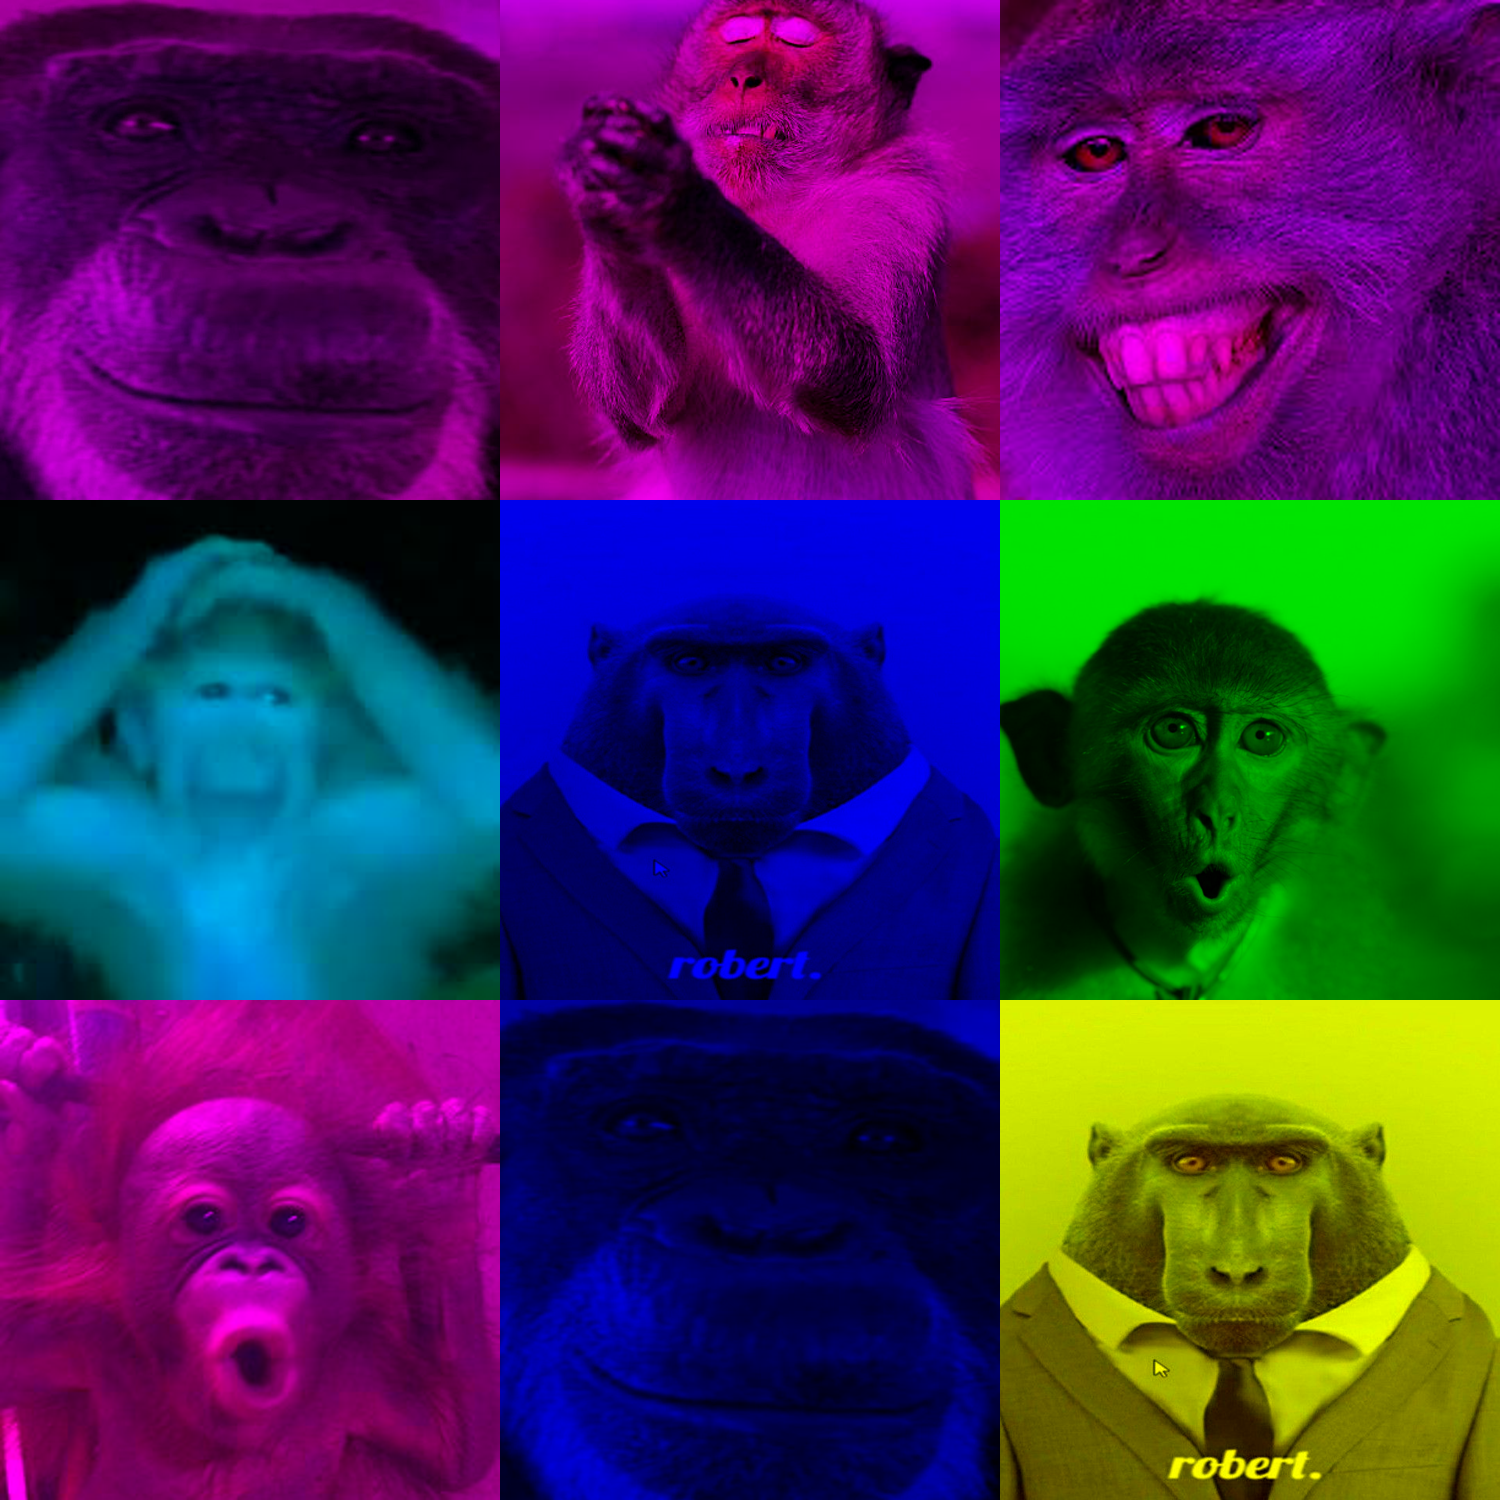

In [9]:
poster2 = create_poster(r'D:\piton\lab4', 'poster_1', 3, 3)
print("Постер 2 (2x2) - 4 зображення:")
display(poster2)


Постер 3 (2x2) - 4 зображення:


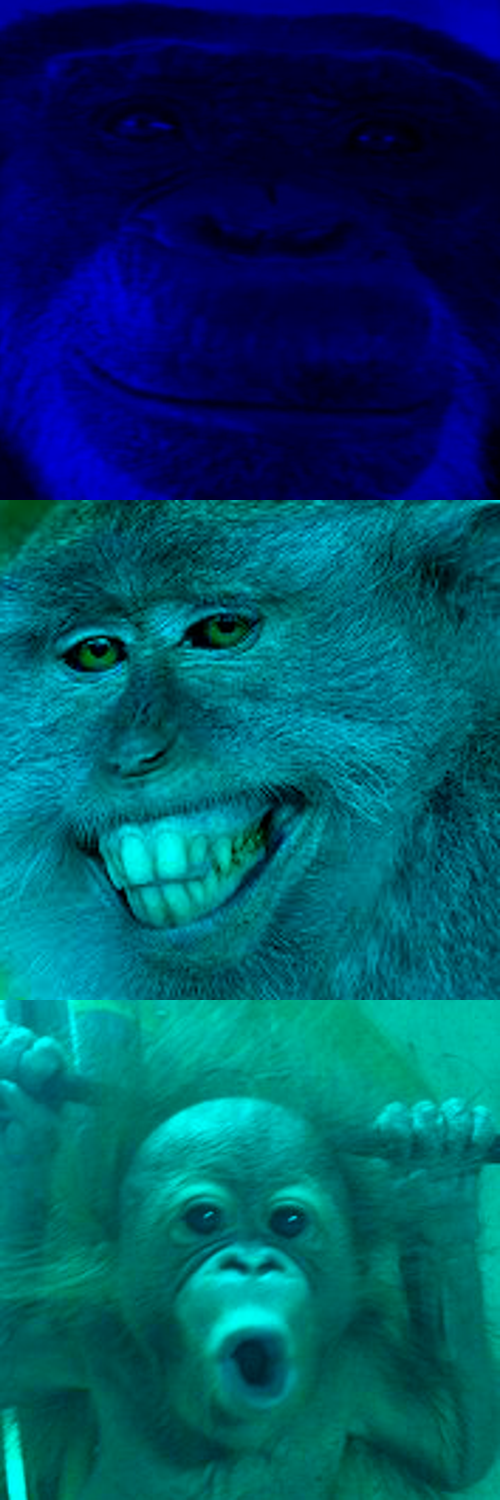

In [5]:
poster3 = create_poster(r'D:\piton\lab4', 'poster_1', 1, 3)
print("Постер 3 (2x2) - 4 зображення:")
display(poster3)